# WOMENS CLOTHING RECOMMENDATION SYSTEM 

## Team Members:- Bhawana Tiwari(DS5B-2010) , Tanisha Bhawsar(DS5B-2035)

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [4]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
data=data.drop(columns=['Title','Review Text','Recommended IND','Positive Feedback Count','Division Name','Department Name','Unnamed: 0'])

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

Clothing ID    0
Age            0
Rating         0
Class Name     0
dtype: int64

In [9]:
data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [10]:
data1= data.filter(['Clothing ID','Class Name','Rating'])

In [11]:
data1

,Clothing ID,Class Name,Rating
0,767,Intimates,4
1,1080,Dresses,5
2,1077,Dresses,3
3,1049,Pants,5
4,847,Blouses,5
...,...,...,...
23481,1104,Dresses,5
23482,862,Knits,3
23483,1104,Dresses,3
23484,1084,Dresses,3


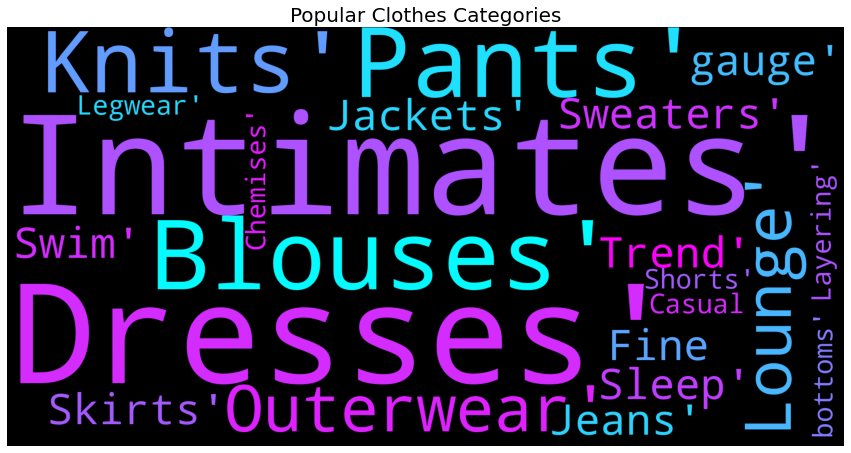

In [12]:
#let's check popular clothes categories
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 100, colormap='cool',min_font_size=12).generate(str(data['Class Name'].unique()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular Clothes Categories',fontsize = 20)
plt.show()

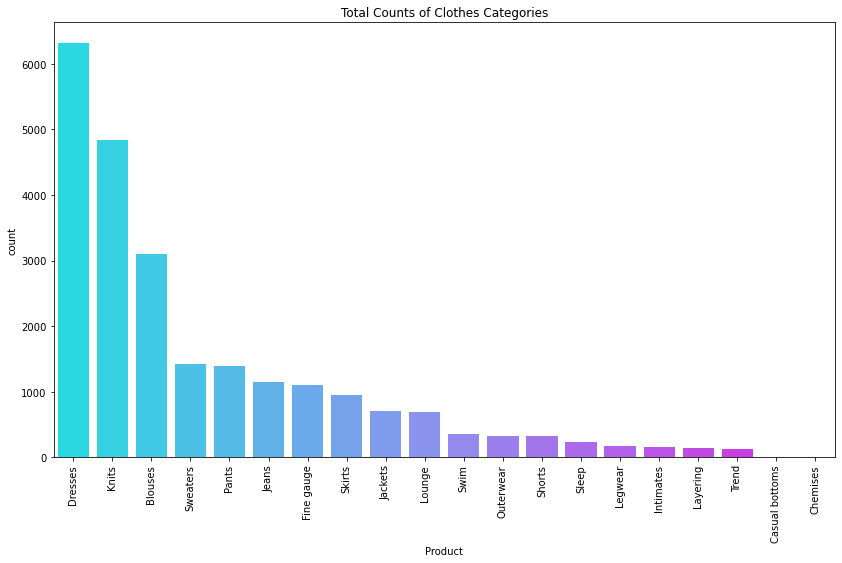

In [13]:
#Total Counts of Clothes Categories
import seaborn as sns
plt.rcParams['figure.figsize'] = (14,8)
sns.countplot(data=data, x=data['Class Name'],
             order = data['Class Name'].value_counts().index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Total Counts of Clothes Categories')
plt.show()

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


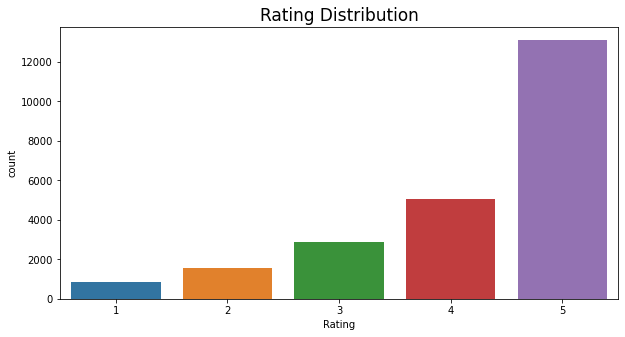

In [14]:
#count plot of the ratings
plt.figure(figsize=(10,5))
ax=sns.countplot(data['Rating'])
ax.set_title('Rating Distribution',fontsize=17)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Class Name']=le.fit_transform(data1["Class Name"])

In [16]:
data1.head()

,Clothing ID,Class Name,Rating
0,767,5,4
1,1080,3,5
2,1077,3,3
3,1049,13,5
4,847,0,5


In [17]:
from sklearn.metrics import euclidean_distances
result=euclidean_distances(data1)

In [18]:
result

array([[  0.        , 313.00798712, 310.00806441, ..., 337.00741832,
        317.00788634, 337.00741832],
       [313.00798712,   0.        ,   3.60555128, ...,  24.08318916,
          4.47213595,  24.        ],
       [310.00806441,   3.60555128,   0.        , ...,  27.        ,
          7.        ,  27.07397274],
       ...,
       [337.00741832,  24.08318916,  27.        , ...,   0.        ,
         20.        ,   2.        ],
       [317.00788634,   4.47213595,   7.        , ...,  20.        ,
          0.        ,  20.09975124],
       [337.00741832,  24.        ,  27.07397274, ...,   2.        ,
         20.09975124,   0.        ]])

In [19]:
category=input("Enter the category of cloth :")

Enter the category of cloth :Jackets


In [20]:
search=data1.index[data["Class Name"]==category]
search

Int64Index([  121,   128,   133,   136,   263,   267,   271,   272,   280,
              287,
            ...
            22393, 22723, 23192, 23195, 23199, 23205, 23207, 23223, 23228,
            23450],
           dtype='int64', length=704)

In [21]:
data.head()

,Clothing ID,Age,Rating,Class Name
0,767,33,4,Intimates
1,1080,34,5,Dresses
2,1077,60,3,Dresses
3,1049,50,5,Pants
4,847,47,5,Blouses


In [22]:
array_length = len(search)

In [23]:

for i in range(array_length):
    i_d= (data1['Clothing ID'][search[i]])
    print(i_d)

966
966
966
966
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
964
964
967
964
964
964
967
964
984
984
984
984
984
984
984
984
984
984
984
984
984
985
985
985
969
975
975
975
975
975
979
979
979
979
977
977
985
985
985
964
970
970
964
964
964
984
984
984
984
984
984
964
964
964
964
964
964
964
969
975
975
975
984
984
984
984
972
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
984
986
984
984
959
955
965
965
965
965
965
965
965
965
965
959
986
975
975
964
964
964
964
964
964
964
975
963
963
963
963
984
984
964
964
977
977
977
977
977
978
985
985
965
985
965
985
965
985
985
985
965
985
985
985
965
985
985
965
984
975
974
974
974
974
974
974
974
974
974
974
974
974
1119
976
985
985
985
985
985
985
985
984
984
984
1119
964
964
964
964
964
964
985
984
984
984
973
964
964
975
975
975
975
975
975
975
975
975
975
975
977
975
975
977
975
975
975
975
975
986
986
967
967
967
970
970
984
984
984
984
984
984
984
984
984
985
96

In [24]:
i_d=[data1['Clothing ID'][search[i]] for i in range(array_length)]

In [25]:
i_d

[966,
 966,
 966,
 966,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 964,
 964,
 967,
 964,
 964,
 964,
 967,
 964,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 985,
 985,
 985,
 969,
 975,
 975,
 975,
 975,
 975,
 979,
 979,
 979,
 979,
 977,
 977,
 985,
 985,
 985,
 964,
 970,
 970,
 964,
 964,
 964,
 984,
 984,
 984,
 984,
 984,
 984,
 964,
 964,
 964,
 964,
 964,
 964,
 964,
 969,
 975,
 975,
 975,
 984,
 984,
 984,
 984,
 972,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 984,
 986,
 984,
 984,
 959,
 955,
 965,
 965,
 965,
 965,
 965,
 965,
 965,
 965,
 965,
 959,
 986,
 975,
 975,
 964,
 964,
 964,
 964,
 964,
 964,
 964,
 975,
 963,
 963,
 963,
 963,
 984,
 984,
 964,
 964,
 977,
 977,
 977,
 977,
 977,
 978,
 985,
 985,
 965,
 985,
 965,
 985,
 965,
 985,
 985,
 985,
 965,
 985,
 985

In [26]:
df1=pd.DataFrame(i_d)
df1.columns=['Clothing ID']
            

In [27]:
data2=data1[['Rating','Clothing ID']]

In [28]:
df2=pd.DataFrame(data2)

In [29]:
df=[df1,df2]
df=pd.concat(df)
df=df.dropna()


In [30]:
df.sort_values(by='Rating',ascending=False)

,Clothing ID,Rating
11737,850,5.0
13385,1153,5.0
13387,967,5.0
13388,936,5.0
13389,1072,5.0
...,...,...
22170,169,1.0
692,1110,1.0
22167,862,1.0
11113,90,1.0


In [31]:
rating=eval(input("enter the rating you pant in your product"))

enter the rating you pant in your product5.0


In [32]:
rating_index=df.index[df["Rating"]==rating]
rating_index

Int64Index([    1,     3,     4,     6,     8,     9,    11,    12,    13,
               17,
            ...
            23467, 23468, 23470, 23472, 23473, 23474, 23479, 23480, 23481,
            23485],
           dtype='int64', length=13117)

In [37]:
array_length = len(search)
for i in range(array_length):
    clothing_id= (df['Clothing ID'][rating_index[i]])
    print(clothing_id)

1080
1049
847
858
1077
1077
1095
1095
767
853
1120
1077
847
684
4
1060
1060
1060
697
949
684
862
862
910
862
862
823
910
862
862
862
862
1095
862
862
862
862
850
1081
845
836
1072
863
1133
822
850
861
1081
863
1133
822
836
836
1081
836
1081
1078
836
861
966
1196
836
1133
863
966
845
1008
829
1126
1008
1008
1011
1008
1008
1008
829
1008
1008
1020
895
862
1104
670
329
1020
895
895
895
895
895
596
895
1020
895
862
1020
895
895
895
862
895
895
1104
1094
828
1094
828
1020
895
647
1025
815
840
1066
1030
840
1066
647
872
1066
872
1030
1026
840
1066
647
840
840
824
1115
840
984
1104
1104
1104
984
984
1104
878
1182
868
868
565
984
1104
868
878
1104
984
984
984
984
1024
984
1104
1024
984
1104
984
984
895
1104
984
1104
831
1104
836
836
836
844
936
895
836
831
844
895
1066
836
907
836
866
907
895
895
1080
831
844
831
836
907
895
895
907
844
844
907
936
907
895
580
895
862
844
895
836
895
895
895
836
1049
862
1089
936
936
936
1035
995
1104
1089
902
1094
936
936
1094
1094
1086
127
127
872
831
1077
96

In [38]:
clothing_id=[df['Clothing ID'][rating_index[i]] for i in range(array_length)]

In [39]:
clothing_id=pd.DataFrame(clothing_id)
clothing_id.columns=['Clothing ID with your prefered rating']
clothing_id.head(10)

,Clothing ID with your prefered rating
0,1080
1,1049
2,847
3,858
4,1077
5,1077
6,1095
7,1095
8,767
9,853
